In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Dataset from the NEDL google drive
url = 'https://drive.usercontent.google.com/download?id=1floGmqRy7mE8e-F9PKmHWDm_ALGJGu73&export=download&confirm=t&uuid=5a1eceae-e9da-46f2-95eb-c3900511abd2'
df = pd.read_excel(url, sheet_name='Logit')

In [3]:
# Clean dataset
# Remove unnecesary columns and use first row as headers

df.drop(df.index[0:6], inplace=True)
df.reset_index(drop=True, inplace=True)
df.columns = df.iloc[0]

df = df.iloc[1:]
df = df.iloc[0:500]

df.drop('id', axis=1, inplace=True)
df = df.iloc[:,0:16]
df.drop(df.columns[4:11], axis=1, inplace=True)

df.reset_index(drop=True, inplace=True)
df.index.name = 'ID'
df.head()

,Default,Constant,Homeowner,Employed,Income,Expenses,Assets,Debt,Loan amount
ID,,,,,,,,,
0,0,1,0,0,129,73,0,0,800
1,0,1,0,1,131,48,0,0,1000
2,1,1,1,0,200,90,3000,0,2000
3,0,1,0,1,182,63,2500,0,900
4,0,1,0,1,107,46,0,0,310


In [4]:
df = df.astype(str).astype(int)
df.dtypes

0
Default        int32
Constant       int32
Homeowner      int32
Employed       int32
Income         int32
Expenses       int32
Assets         int32
Debt           int32
Loan amount    int32
dtype: object

In [5]:
# Select our target and predicting variables
y = df['Default']
X = df.drop(['Default'], axis=1)

# 

#### Let´s have quick look at the distribution of the target variable. This is important for future reference.

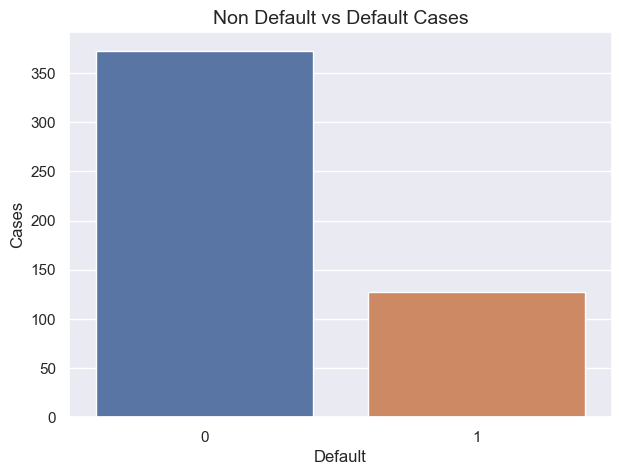

In [6]:
# Count plot of the the target variable's two possible outcomes 

default_count = pd.DataFrame(df['Default'].value_counts())

plt.figure(figsize=(7,5), dpi=100)
sns.set_theme()
sns.barplot(data=default_count, x=default_count.index, y='count')
plt.xlabel('Default', size=12)
plt.ylabel('Cases', size=12)
plt.title('Non Default vs Default Cases', size=14)
plt.show()

# 

### In this notebook we will apply (Stratified)KFold cross validation, which improves upon simple train test split cross validation 

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [8]:
# prepare cross validation KFolds
kf = KFold(n_splits=5, shuffle=True, random_state=45229)

# enumerate splits
for i, (train, test) in enumerate(kf.split(df)):
    print(f"Fold {i}:")
    print('train rows:', (train), '\n')
    print('test rows:', (test),'\n \n')

Fold 0:
train rows: [  0   1   2   3   4   5   6   8   9  10  11  12  14  15  16  17  18  21
  22  24  25  26  27  28  31  32  33  34  35  36  37  39  40  41  43  45
  47  48  50  51  53  54  55  57  58  59  60  61  62  63  64  66  67  68
  70  71  73  74  75  77  78  79  80  81  82  83  84  85  86  87  89  90
  91  93  94  95  96  97  98  99 100 101 102 103 104 105 109 111 112 113
 114 116 118 119 120 121 122 123 124 125 127 128 129 130 131 133 134 135
 136 137 138 139 141 142 143 144 146 147 148 149 150 151 152 153 154 155
 156 157 158 160 161 162 163 164 165 167 168 170 171 172 175 176 177 178
 179 180 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 204 205 207 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 227 228 229 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 254 255 257 258 260
 262 263 264 265 266 267 268 269 270 272 273 274 275 276 278 279 280 281
 282 284 285 286 288 289 290 29

In [9]:
# prepare cross validation Stratified KFolds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=45229)

# enumerate splits
for i, (train, test) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    print('train rows:', (train), '\n')
    print('test rows:', (test),'\n \n')

Fold 0:
train rows: [  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  19
  20  21  22  23  25  26  28  29  30  31  32  33  34  35  36  37  38  39
  40  42  44  45  46  47  48  49  50  51  52  53  54  55  59  60  61  62
  63  64  65  67  68  71  72  73  74  75  76  78  79  83  84  85  86  87
  88  89  90  91  92  93  94  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 111 112 113 114 115 116 117 118 119 120 124 125 126 130 131
 132 135 136 137 139 140 142 144 145 146 147 148 150 151 152 153 154 155
 156 157 158 161 162 163 165 166 167 168 169 170 171 172 173 174 176 177
 178 181 182 183 184 185 186 188 189 191 192 193 194 195 196 197 199 200
 201 202 203 206 207 208 209 210 214 215 216 220 221 222 223 224 225 226
 227 228 229 231 234 235 236 237 238 241 242 244 245 246 247 248 250 251
 252 253 256 257 258 259 260 261 263 264 265 267 268 269 270 271 272 273
 274 276 278 279 280 284 286 287 289 290 293 294 295 296 297 298 299 301
 302 303 304 305 306 307 308 30

# 

### Cross validation

#### Before doing actual Cross Validation, we'll try a function using train test split method

In [10]:
# First, We start by creating a function to wrap the code lines.
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Then, we create the train and test sets based on the 'X' dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# We get the accuracy score of Logistic Model 
get_score(LogisticRegression(solver='newton-cholesky', fit_intercept=False, penalty=None),
         X_train, X_test, y_train, y_test)

0.73

In [12]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# Then we do the same with the normalised 'X' dataset
x_train = scale.fit(X_train).transform(X_train)
# We do this to 'Untransform' the Constant feature
x_train[:,0] = 1

x_test = scale.fit(X_test).transform(X_test)
x_test[:,0] = 1

get_score(LogisticRegression(solver='newton-cholesky', fit_intercept=False, penalty=None),
         x_train, x_test, y_train, y_test)

0.74

# 

#### Data transformation and datasets creation

In [13]:
'''
We've got to create six predicting datasets. 
We will first create three datasets by adding new features. 
Later on we'll normalise their training and testing sets (not the complete sets, to avoid data leakage)
That'll give us six in total. Each corresponding to a different logistic model
'''

# X1: We only include transformed continous predicting variables
X1 = X.loc[:]
X1['log(E/I)'] = np.log(X1['Expenses']/X1['Income'])
X1['log(D/A)'] = np.log((X1['Debt']+X1['Loan amount'])/(X1['Assets']+X1['Loan amount']))
X1['log(LA/I)'] = np.log(X1['Loan amount']/X1['Income'])
# Remove original continous variables
X1.drop(['Income', 'Expenses', 'Assets', 'Debt', 'Loan amount'], axis=1, inplace=True)

# X2: Both original and transformed variables
X2 = X.loc[:]
X2['log(E/I)'] = np.log(X2['Expenses']/X2['Income'])
X2['log(D/A)'] = np.log((X2['Debt']+X2['Loan amount'])/(X2['Assets']+X2['Loan amount']))
X2['log(LA/I)'] = np.log(X2['Loan amount']/X2['Income'])

# 

#### Time for actual cross validation

In [14]:
# Take 'X' and 'y' from pandas to numpy
X = X.to_numpy()
y = y.to_numpy()

In [15]:
'''
We'll get a taste of what comes next by applying KFold Cross Val. to a logit model using the 'X' 
predicting dataset.

To get every accuracy score for all cross validation folds we Loop to get a list with the respective
scores
'''

scores_lr = []

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test  = X[train_index], X[test_index], \
                                        y[train_index], y[test_index]
    scores_lr.append(get_score(LogisticRegression(solver='newton-cholesky', fit_intercept=False, penalty=None), 
                              X_train, X_test, y_train, y_test))
    
print('Cross Validation Scores:', scores_lr)
print('Mean Score:',round(np.mean(scores_lr), 4))
print('Std of Score:', round(np.std(scores_lr), 4))
sharpe = (scores_lr/np.std(scores_lr)).tolist()
sharpe = [round(i,2) for i in sharpe]
print('Accuracy/Std:', sharpe)
print('Mean/Std:', np.mean(sharpe))

Cross Validation Scores: [0.7, 0.78, 0.84, 0.74, 0.83]
Mean Score: 0.778
Std of Score: 0.0531
Accuracy/Std: [13.19, 14.7, 15.83, 13.94, 15.64]
Mean/Std: 14.66


In [16]:
from sklearn.model_selection import cross_val_score
# Then, we compare the results with the cross_val_method from the sklearn library

scores = cross_val_score(LogisticRegression(solver='newton-cholesky', 
                                   fit_intercept=False, penalty=None), X, y, cv=kf)
scores = list(scores)

print('Cross Validation Scores:', scores)
print('Mean Score:',round(np.mean(scores), 4))
print('Std of Score:', round(np.std(scores), 4))
sharpe = (scores/np.std(scores)).tolist()
sharpe = [round(i,2) for i in sharpe]
print('Accuracy/Std:', sharpe)
print('Mean/Std:', np.mean(sharpe))

Cross Validation Scores: [0.7, 0.78, 0.84, 0.74, 0.83]
Mean Score: 0.778
Std of Score: 0.0531
Accuracy/Std: [13.19, 14.7, 15.83, 13.94, 15.64]
Mean/Std: 14.66


### It´s plain to see the results are identical with both methods

# 

In [17]:
# Convert the remaining variables to numpy array

X1 = X1.to_numpy()
X2 = X2.to_numpy()

In [18]:
'''
To get every accuracy score for all cross validation folds of all (three) datasets
We make a nested loop list the scores of each model.
'''

scores_lr = []

for i in [X, X1, X2]:
    for train_index, test_index in kf.split(i):
        X_train, X_test, y_train, y_test  = i[train_index], i[test_index], \
                                            y[train_index], y[test_index]
        
        scores_lr.append(get_score(LogisticRegression(solver='newton-cholesky', fit_intercept=False, penalty=None), 
                                  X_train, X_test, y_train, y_test))

    print('Cross Validation Scores:', scores_lr)
    print('Mean Score:',round(np.mean(scores_lr), 4))
    print('Std of Score:', round(np.std(scores_lr), 4))
    sharpe = (scores_lr/np.std(scores_lr)).tolist()
    sharpe = [round(i,2) for i in sharpe]
    print('Accuracy/Std:', sharpe)
    print('Mean/Std:', round(np.mean(sharpe), 2), '\n')
    scores_lr = []
    

Cross Validation Scores: [0.7, 0.78, 0.84, 0.74, 0.83]
Mean Score: 0.778
Std of Score: 0.0531
Accuracy/Std: [13.19, 14.7, 15.83, 13.94, 15.64]
Mean/Std: 14.66 

Cross Validation Scores: [0.75, 0.78, 0.82, 0.71, 0.79]
Mean Score: 0.77
Std of Score: 0.0374
Accuracy/Std: [20.04, 20.85, 21.92, 18.98, 21.11]
Mean/Std: 20.58 

Cross Validation Scores: [0.76, 0.79, 0.81, 0.7, 0.82]
Mean Score: 0.776
Std of Score: 0.0432
Accuracy/Std: [17.6, 18.3, 18.76, 16.21, 18.99]
Mean/Std: 17.97 



In [19]:
# Only for the sake of consistency we repeat the procedure with cross_val_score
# Results must be identical

for i in [X, X1, X2]:    
    scores = cross_val_score(LogisticRegression(solver='newton-cholesky', 
                                       fit_intercept=False, penalty=None), i, y, cv=kf)
    scores = list(scores)

    print('Cross Validation Scores:', scores)
    print('Mean Score:',round(np.mean(scores), 4))
    print('Std of Score:', round(np.std(scores), 4))
    sharpe = (scores/np.std(scores)).tolist()
    sharpe = [round(i,2) for i in sharpe]
    print('Accuracy/Std:', sharpe)
    print('Mean/Std:', round(np.mean(sharpe), 2), '\n')

Cross Validation Scores: [0.7, 0.78, 0.84, 0.74, 0.83]
Mean Score: 0.778
Std of Score: 0.0531
Accuracy/Std: [13.19, 14.7, 15.83, 13.94, 15.64]
Mean/Std: 14.66 

Cross Validation Scores: [0.75, 0.78, 0.82, 0.71, 0.79]
Mean Score: 0.77
Std of Score: 0.0374
Accuracy/Std: [20.04, 20.85, 21.92, 18.98, 21.11]
Mean/Std: 20.58 

Cross Validation Scores: [0.76, 0.79, 0.81, 0.7, 0.82]
Mean Score: 0.776
Std of Score: 0.0432
Accuracy/Std: [17.6, 18.3, 18.76, 16.21, 18.99]
Mean/Std: 17.97 



In [20]:
# It's time to tabulate some results

# tabl1
dicc = {'Mean Acc. Score': [0.778], 
        'Std of Acc. Score': [0.0531], 
        'Mean/Std': [14.6]}

tbl1 = pd.DataFrame(dicc).T.rename(columns={0: 'Log 1'})
tbl1.index.name = 'Metric'

#table2 
dicc = {'Mean Acc. Score': [0.77], 
        'Std of Acc. Score': [0.0374], 
        'Mean/Std': [20.58]}

tbl2 = pd.DataFrame(dicc).T.rename(columns={0: 'Log 2'})
tbl2.index.name = 'Metric'

# table 3                                         
dicc = {'Mean Acc. Score': [0.776], 
        'Std of Acc. Score': [0.0432], 
        'Mean/Std': [17.97 ]}

tbl3 = pd.DataFrame(dicc).T.rename(columns={0: 'Log 3'})
tbl3.index.name = 'Metric'

table = pd.concat([tbl1, tbl2, tbl3], axis=1)
table

,Log 1,Log 2,Log 3
Metric,,,
Mean Acc. Score,0.7780,0.7700,0.7760
Std of Acc. Score,0.0531,0.0374,0.0432
Mean/Std,14.6000,20.5800,17.9700


# 

#### We apply the same procedure, this time using the normalised datasets

In [21]:
scores_lr_n = []

for i in [X, X1, X2]:
    for train_index, test_index in kf.split(i):
        X_train, X_test, y_train, y_test  = i[train_index], i[test_index], \
                                            y[train_index], y[test_index]
        
        x_train = scale.fit(X_train).transform(X_train)
        x_train[:,0] = 1
        
        x_test = scale.fit(X_test).transform(X_test)
        x_test[:,0] = 1
        
        scores_lr_n.append(get_score(LogisticRegression(solver='newton-cholesky', fit_intercept=False, penalty=None), 
                                  x_train, x_test, y_train, y_test))
    
    print('Cross Validation Scores:', scores_lr_n)
    print('Mean Score:',round(np.mean(scores_lr_n), 4))
    print('Std of Score:', round(np.std(scores_lr_n), 4))
    sharpe = (scores_lr_n/np.std(scores_lr_n)).tolist()
    sharpe = [round(i,2) for i in sharpe]
    print('Accuracy/Std:', sharpe)
    print('Mean/Std:', round(np.mean(sharpe), 2), '\n')
    scores_lr_n = []

Cross Validation Scores: [0.76, 0.76, 0.79, 0.76, 0.8]
Mean Score: 0.774
Std of Score: 0.0174
Accuracy/Std: [43.59, 43.59, 45.31, 43.59, 45.88]
Mean/Std: 44.39 

Cross Validation Scores: [0.76, 0.78, 0.81, 0.71, 0.79]
Mean Score: 0.77
Std of Score: 0.0341
Accuracy/Std: [22.31, 22.9, 23.78, 20.85, 23.2]
Mean/Std: 22.61 

Cross Validation Scores: [0.75, 0.78, 0.79, 0.74, 0.81]
Mean Score: 0.774
Std of Score: 0.0258
Accuracy/Std: [29.11, 30.27, 30.66, 28.72, 31.43]
Mean/Std: 30.04 



In [22]:
# Make tables for models with normalised datasets

# tabl1
dicc = {'Mean Acc. Score': [0.774], 
        'Std of Acc. Score': [0.0174], 
        'Mean/Std': [44.39]}

tbl1 = pd.DataFrame(dicc).T.rename(columns={0: 'Log 1 (norm)'})
tbl1.index.name = 'Metric'

#table2 
dicc = {'Mean Acc. Score': [0.77], 
        'Std of Acc. Score': [0.0341], 
        'Mean/Std': [22.61]}

tbl2 = pd.DataFrame(dicc).T.rename(columns={0: 'Log 2 (norm)'})
tbl2.index.name = 'Metric'

# table 3 
dicc = {'Mean Acc. Score': [0.774], 
        'Std of Acc. Score': [0.0258], 
        'Mean/Std': [30.04]}

tbl3 = pd.DataFrame(dicc).T.rename(columns={0: 'Log 3 (norm)'})
tbl3.index.name = 'Metric'

table1 = pd.concat([tbl1, tbl2, tbl3], axis=1)

#######################################################
# Make final table
table1 = pd.concat([table, table1], axis=1)
table1

,Log 1,Log 2,Log 3,Log 1 (norm),Log 2 (norm),Log 3 (norm)
Metric,,,,,,
Mean Acc. Score,0.7780,0.7700,0.7760,0.7740,0.7700,0.7740
Std of Acc. Score,0.0531,0.0374,0.0432,0.0174,0.0341,0.0258
Mean/Std,14.6000,20.5800,17.9700,44.3900,22.6100,30.0400


#

#### We do same analysis with Stratified KFold Split

In [23]:
# Get metrics for logit models with NON normalised datasets using Stratified KFold

for i in [X, X1, X2]:    
    scores = cross_val_score(LogisticRegression(solver='newton-cholesky', 
                                       fit_intercept=False, penalty=None), i, y, cv=skf)
    scores = list(scores)

    print('Cross Validation Scores:', scores)
    print('Mean Score:',round(np.mean(scores), 4))
    print('Std of Score:', round(np.std(scores), 4))
    sharpe = (scores/np.std(scores)).tolist()
    sharpe = [round(i,2) for i in sharpe]
    print('Accuracy/Std:', sharpe)
    print('Mean/Std:', round(np.mean(sharpe), 2), '\n')

Cross Validation Scores: [0.83, 0.75, 0.8, 0.73, 0.75]
Mean Score: 0.772
Std of Score: 0.0371
Accuracy/Std: [22.38, 20.22, 21.57, 19.68, 20.22]
Mean/Std: 20.81 

Cross Validation Scores: [0.79, 0.76, 0.81, 0.73, 0.74]
Mean Score: 0.766
Std of Score: 0.0301
Accuracy/Std: [26.28, 25.28, 26.94, 24.28, 24.61]
Mean/Std: 25.48 

Cross Validation Scores: [0.8, 0.78, 0.81, 0.74, 0.75]
Mean Score: 0.776
Std of Score: 0.0273
Accuracy/Std: [29.33, 28.6, 29.7, 27.13, 27.5]
Mean/Std: 28.45 



In [24]:
# It's time to tabulate results

# tabl1
dicc = {'Mean Acc. Score': [0.772], 
        'Std of Acc. Score': [0.0371], 
        'Mean/Std': [20.81]}

tbl1 = pd.DataFrame(dicc).T.rename(columns={0: 'Log 1'})
tbl1.index.name = 'Metric'

#table2 
dicc = {'Mean Acc. Score': [0.766], 
        'Std of Acc. Score': [0.0301], 
        'Mean/Std': [25.48]}

tbl2 = pd.DataFrame(dicc).T.rename(columns={0: 'Log 2'})
tbl2.index.name = 'Metric'

# table 3                                         
dicc = {'Mean Acc. Score': [0.776], 
        'Std of Acc. Score': [0.0273], 
        'Mean/Std': [28.45]}

tbl3 = pd.DataFrame(dicc).T.rename(columns={0: 'Log 3'})
tbl3.index.name = 'Metric'

table = pd.concat([tbl1, tbl2, tbl3], axis=1)
table

,Log 1,Log 2,Log 3
Metric,,,
Mean Acc. Score,0.7720,0.7660,0.7760
Std of Acc. Score,0.0371,0.0301,0.0273
Mean/Std,20.8100,25.4800,28.4500


Confusion Matrices: [array([[71,  4],
       [13, 12]], dtype=int64), array([[71,  4],
       [21,  4]], dtype=int64), array([[71,  4],
       [16,  9]], dtype=int64), array([[66,  8],
       [19,  7]], dtype=int64), array([[70,  4],
       [21,  5]], dtype=int64), array([[70,  5],
       [16,  9]], dtype=int64), array([[73,  2],
       [22,  3]], dtype=int64), array([[70,  5],
       [14, 11]], dtype=int64), array([[67,  7],
       [20,  6]], dtype=int64), array([[69,  5],
       [21,  5]], dtype=int64), array([[68,  7],
       [13, 12]], dtype=int64), array([[73,  2],
       [20,  5]], dtype=int64), array([[71,  4],
       [15, 10]], dtype=int64), array([[67,  7],
       [19,  7]], dtype=int64), array([[70,  4],
       [21,  5]], dtype=int64)] 

SKF Average Confusion Matrices
SKF Confusion Matrix: X
[[69.8  4.8]
 [18.   7.4]] 

SKF Confusion Matrix: X1
[[69.8  4.8]
 [18.6  6.8]] 

SKF Confusion Matrix: X2
[[69.8  4.8]
 [17.6  7.8]]


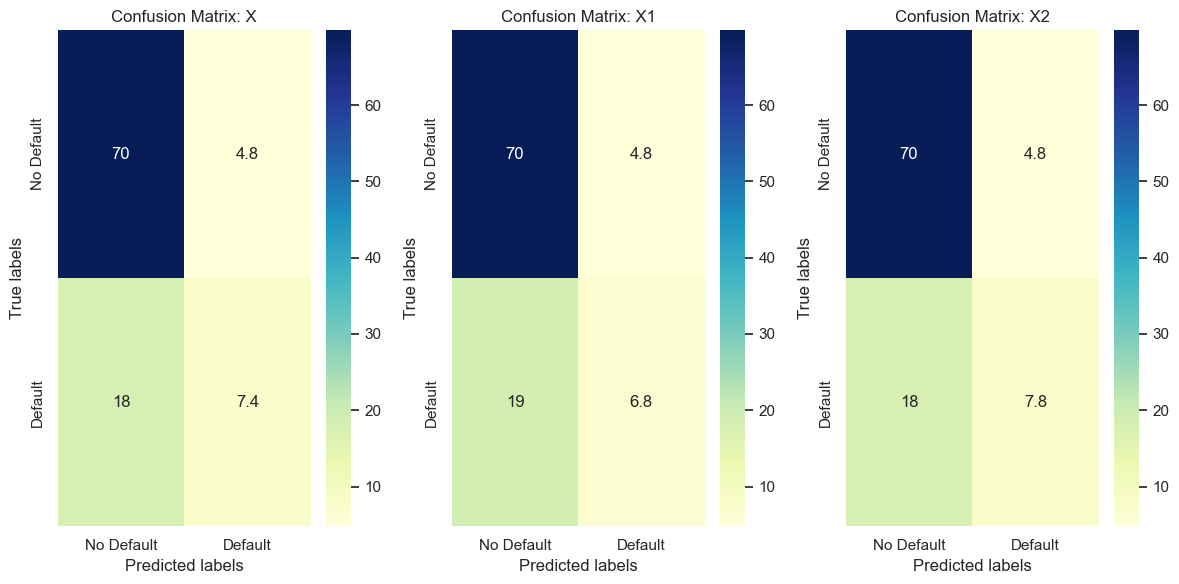

In [27]:
from sklearn.metrics import confusion_matrix
# And now, we plot the average confusion matrices for X, X1, X2, obtained with SKF.

#First, we create every confusion matrix for every fold of every of every model  
lr = LogisticRegression(solver='newton-cholesky', fit_intercept=False, penalty=None)
confs = []

for i in [X, X1, X2]:
    for train_index, test_index in skf.split(X,y):
        X_train, X_test, y_train, y_test  = i[train_index], i[test_index], \
                                            y[train_index], y[test_index]

        y_predict = lr.fit(X_train, y_train).predict(X_test)
        confs.append(confusion_matrix(y_test, y_predict))
    #print()
print('Confusion Matrices:', confs,'\n')

# Then we separate the matrices according to the model they belong and sum them
# The result is three different matrices

print('SKF Average Confusion Matrices')
# First matrix
suma = 0
for k in range(0,5):
    suma = suma + confs[k]
print('SKF Confusion Matrix: X')
print(suma/5,'\n')

# Second matrix
suma_1 = 0
for i in range(5,10):
    suma_1 = suma_1 + confs[i]
print('SKF Confusion Matrix: X1')
print(suma_1/5,'\n')

# Third matrix
suma_2 = 0
for j in range(10,15):
    suma_2 = suma_2 + confs[j]
print('SKF Confusion Matrix: X2')
print(suma_2/5)

# Finally, we make plot three average confusion matrices
plt.figure(figsize=(12,6))
ax = plt.subplot(1,3,1)
sns.heatmap(suma/5, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: X'); 
ax.xaxis.set_ticklabels(['No Default', 'Default']); ax.yaxis.set_ticklabels(['No Default', 'Default'])

ax = plt.subplot(1,3,2)
sns.heatmap(suma_1/5, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: X1'); 
ax.xaxis.set_ticklabels(['No Default', 'Default']); ax.yaxis.set_ticklabels(['No Default', 'Default'])
ax = plt.subplot(1,3,3)

sns.heatmap(suma_2/5, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: X2'); 
ax.xaxis.set_ticklabels(['No Default', 'Default']); ax.yaxis.set_ticklabels(['No Default', 'Default'])

plt.tight_layout()
plt.show()

In [28]:
# Get metrics for logit models with NORMALISED datasets using Stratified KFold

scores_lr_n = []

for i in [X, X1, X2]:
    for train_index, test_index in skf.split(i, y):
        X_train, X_test, y_train, y_test  = i[train_index], i[test_index], \
                                            y[train_index], y[test_index]
        
        x_train = scale.fit(X_train).transform(X_train)
        x_train[:,0] = 1
        
        x_test = scale.fit(X_test).transform(X_test)
        x_test[:,0] = 1
        
        scores_lr_n.append(get_score(LogisticRegression(solver='newton-cholesky', fit_intercept=False, penalty=None), 
                                  x_train, x_test, y_train, y_test))
    
    print('Cross Validation Scores:', scores_lr_n)
    print('Mean Score:',round(np.mean(scores_lr_n), 4))
    print('Std of Score:', round(np.std(scores_lr_n), 4))
    sharpe = (scores_lr_n/np.std(scores_lr_n)).tolist()
    sharpe = [round(i,2) for i in sharpe]
    print('Accuracy/Std:', sharpe)
    print('Mean/Std:', round(np.mean(sharpe), 2), '\n')
    scores_lr_n = []

Cross Validation Scores: [0.82, 0.75, 0.78, 0.73, 0.74]
Mean Score: 0.764
Std of Score: 0.0326
Accuracy/Std: [25.14, 22.99, 23.91, 22.38, 22.69]
Mean/Std: 23.42 

Cross Validation Scores: [0.8, 0.75, 0.81, 0.74, 0.77]
Mean Score: 0.774
Std of Score: 0.0273
Accuracy/Std: [29.33, 27.5, 29.7, 27.13, 28.23]
Mean/Std: 28.38 

Cross Validation Scores: [0.77, 0.79, 0.8, 0.73, 0.77]
Mean Score: 0.772
Std of Score: 0.024
Accuracy/Std: [32.08, 32.92, 33.33, 30.42, 32.08]
Mean/Std: 32.17 



Confusion Matrices: [array([[71,  4],
       [14, 11]], dtype=int64), array([[71,  4],
       [21,  4]], dtype=int64), array([[68,  7],
       [15, 10]], dtype=int64), array([[65,  9],
       [18,  8]], dtype=int64), array([[68,  6],
       [20,  6]], dtype=int64), array([[71,  4],
       [16,  9]], dtype=int64), array([[71,  4],
       [21,  4]], dtype=int64), array([[71,  4],
       [15, 10]], dtype=int64), array([[68,  6],
       [20,  6]], dtype=int64), array([[69,  5],
       [18,  8]], dtype=int64), array([[68,  7],
       [16,  9]], dtype=int64), array([[72,  3],
       [18,  7]], dtype=int64), array([[70,  5],
       [15, 10]], dtype=int64), array([[67,  7],
       [20,  6]], dtype=int64), array([[70,  4],
       [19,  7]], dtype=int64)] 

SKF Average Confusion Matrices
SKF Confusion Matrix: X
[[68.6  6. ]
 [17.6  7.8]] 

SKF Confusion Matrix: X1
[[70.   4.6]
 [18.   7.4]] 

SKF Confusion Matrix: X2
[[69.4  5.2]
 [17.6  7.8]]


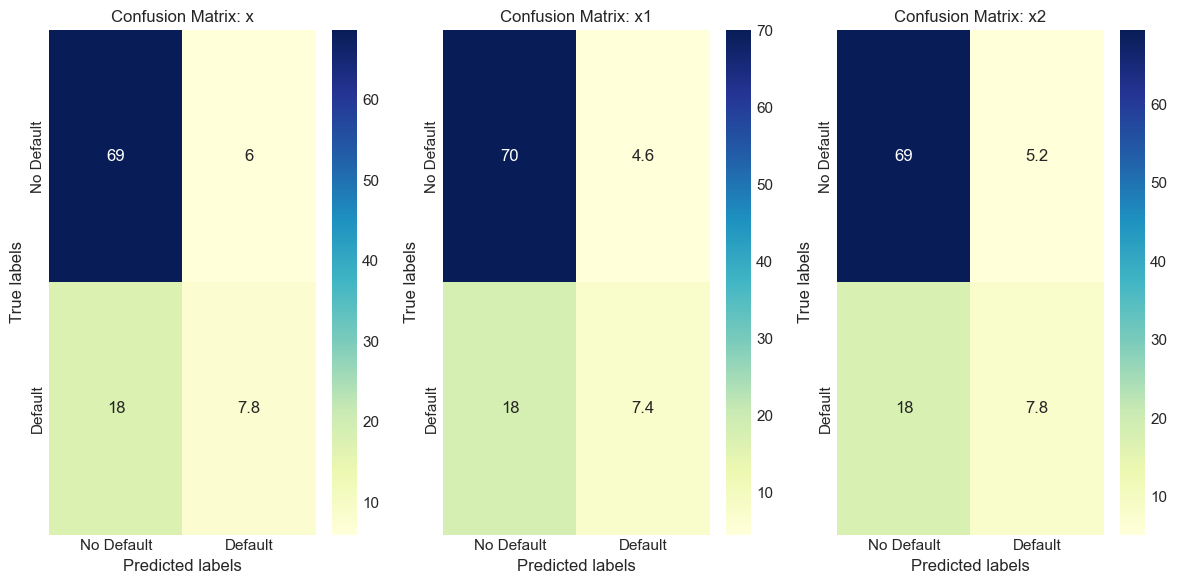

In [38]:
# And now, we plot the average confusion matrices for x, x1, x2, obtained with SKF.

#First, we create every confusion matrix for every fold of every of every model  
lr = LogisticRegression(solver='newton-cholesky', fit_intercept=False, penalty=None)
confs = []

for i in [X, X1, X2]:
    for train_index, test_index in skf.split(X,y):
        X_train, X_test, y_train, y_test  = i[train_index], i[test_index], \
                                            y[train_index], y[test_index]
        
        x_train = scale.fit(X_train).transform(X_train)
        x_train[:,0] = 1
        
        x_test = scale.fit(X_test).transform(X_test)
        x_test[:,0] = 1

        y_predict = lr.fit(x_train, y_train).predict(x_test)
        confs.append(confusion_matrix(y_test, y_predict))
    #print()
print('Confusion Matrices:', confs,'\n')

# Then we separate the matrices according to the model they belong and sum them
# The result is three different matrices

print('SKF Average Confusion Matrices')
# First matrix
suma = 0
for k in range(0,5):
    suma = suma + confs[k]
print('SKF Confusion Matrix: X')
print(suma/5,'\n')

# Second matrix
suma_1 = 0
for i in range(5,10):
    suma_1 = suma_1 + confs[i]
print('SKF Confusion Matrix: X1')
print(suma_1/5,'\n')

# Third matrix
suma_2 = 0
for j in range(10,15):
    suma_2 = suma_2 + confs[j]
print('SKF Confusion Matrix: X2')
print(suma_2/5)

# Finally, we make plot three average confusion matrices
plt.figure(figsize=(12,6))
ax = plt.subplot(1,3,1)
sns.heatmap(suma/5, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: x'); 
ax.xaxis.set_ticklabels(['No Default', 'Default']); ax.yaxis.set_ticklabels(['No Default', 'Default'])

ax = plt.subplot(1,3,2)
sns.heatmap(suma_1/5, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: x1'); 
ax.xaxis.set_ticklabels(['No Default', 'Default']); ax.yaxis.set_ticklabels(['No Default', 'Default'])
ax = plt.subplot(1,3,3)

sns.heatmap(suma_2/5, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: x2'); 
ax.xaxis.set_ticklabels(['No Default', 'Default']); ax.yaxis.set_ticklabels(['No Default', 'Default'])

plt.tight_layout()
plt.show()

In [29]:
# Make tables for models with normalised datasets Stratified KFold

# tabl1
dicc = {'Mean Acc. Score': [0.764], 
        'Std of Acc. Score': [0.0326], 
        'Mean/Std': [23.42]}

tbl1 = pd.DataFrame(dicc).T.rename(columns={0: 'Log 1 (norm)'})
tbl1.index.name = 'Metric'

#table2 
dicc = {'Mean Acc. Score': [0.774], 
        'Std of Acc. Score': [0.0273], 
        'Mean/Std': [28.38]}

tbl2 = pd.DataFrame(dicc).T.rename(columns={0: 'Log 2 (norm)'})
tbl2.index.name = 'Metric'

# table 3 
dicc = {'Mean Acc. Score': [0.772], 
        'Std of Acc. Score': [0.024], 
        'Mean/Std': [32.17]}

tbl3 = pd.DataFrame(dicc).T.rename(columns={0: 'Log 3 (norm)'})
tbl3.index.name = 'Metric'

table1_s = pd.concat([tbl1, tbl2, tbl3], axis=1)

########################################################
# Make final table
table1_s = pd.concat([table, table1_s], axis=1)
table1_s

,Log 1,Log 2,Log 3,Log 1 (norm),Log 2 (norm),Log 3 (norm)
Metric,,,,,,
Mean Acc. Score,0.7720,0.7660,0.7760,0.7640,0.7740,0.772
Std of Acc. Score,0.0371,0.0301,0.0273,0.0326,0.0273,0.024
Mean/Std,20.8100,25.4800,28.4500,23.4200,28.3800,32.170


In [30]:
table1

,Log 1,Log 2,Log 3,Log 1 (norm),Log 2 (norm),Log 3 (norm)
Metric,,,,,,
Mean Acc. Score,0.7780,0.7700,0.7760,0.7740,0.7700,0.7740
Std of Acc. Score,0.0531,0.0374,0.0432,0.0174,0.0341,0.0258
Mean/Std,14.6000,20.5800,17.9700,44.3900,22.6100,30.0400


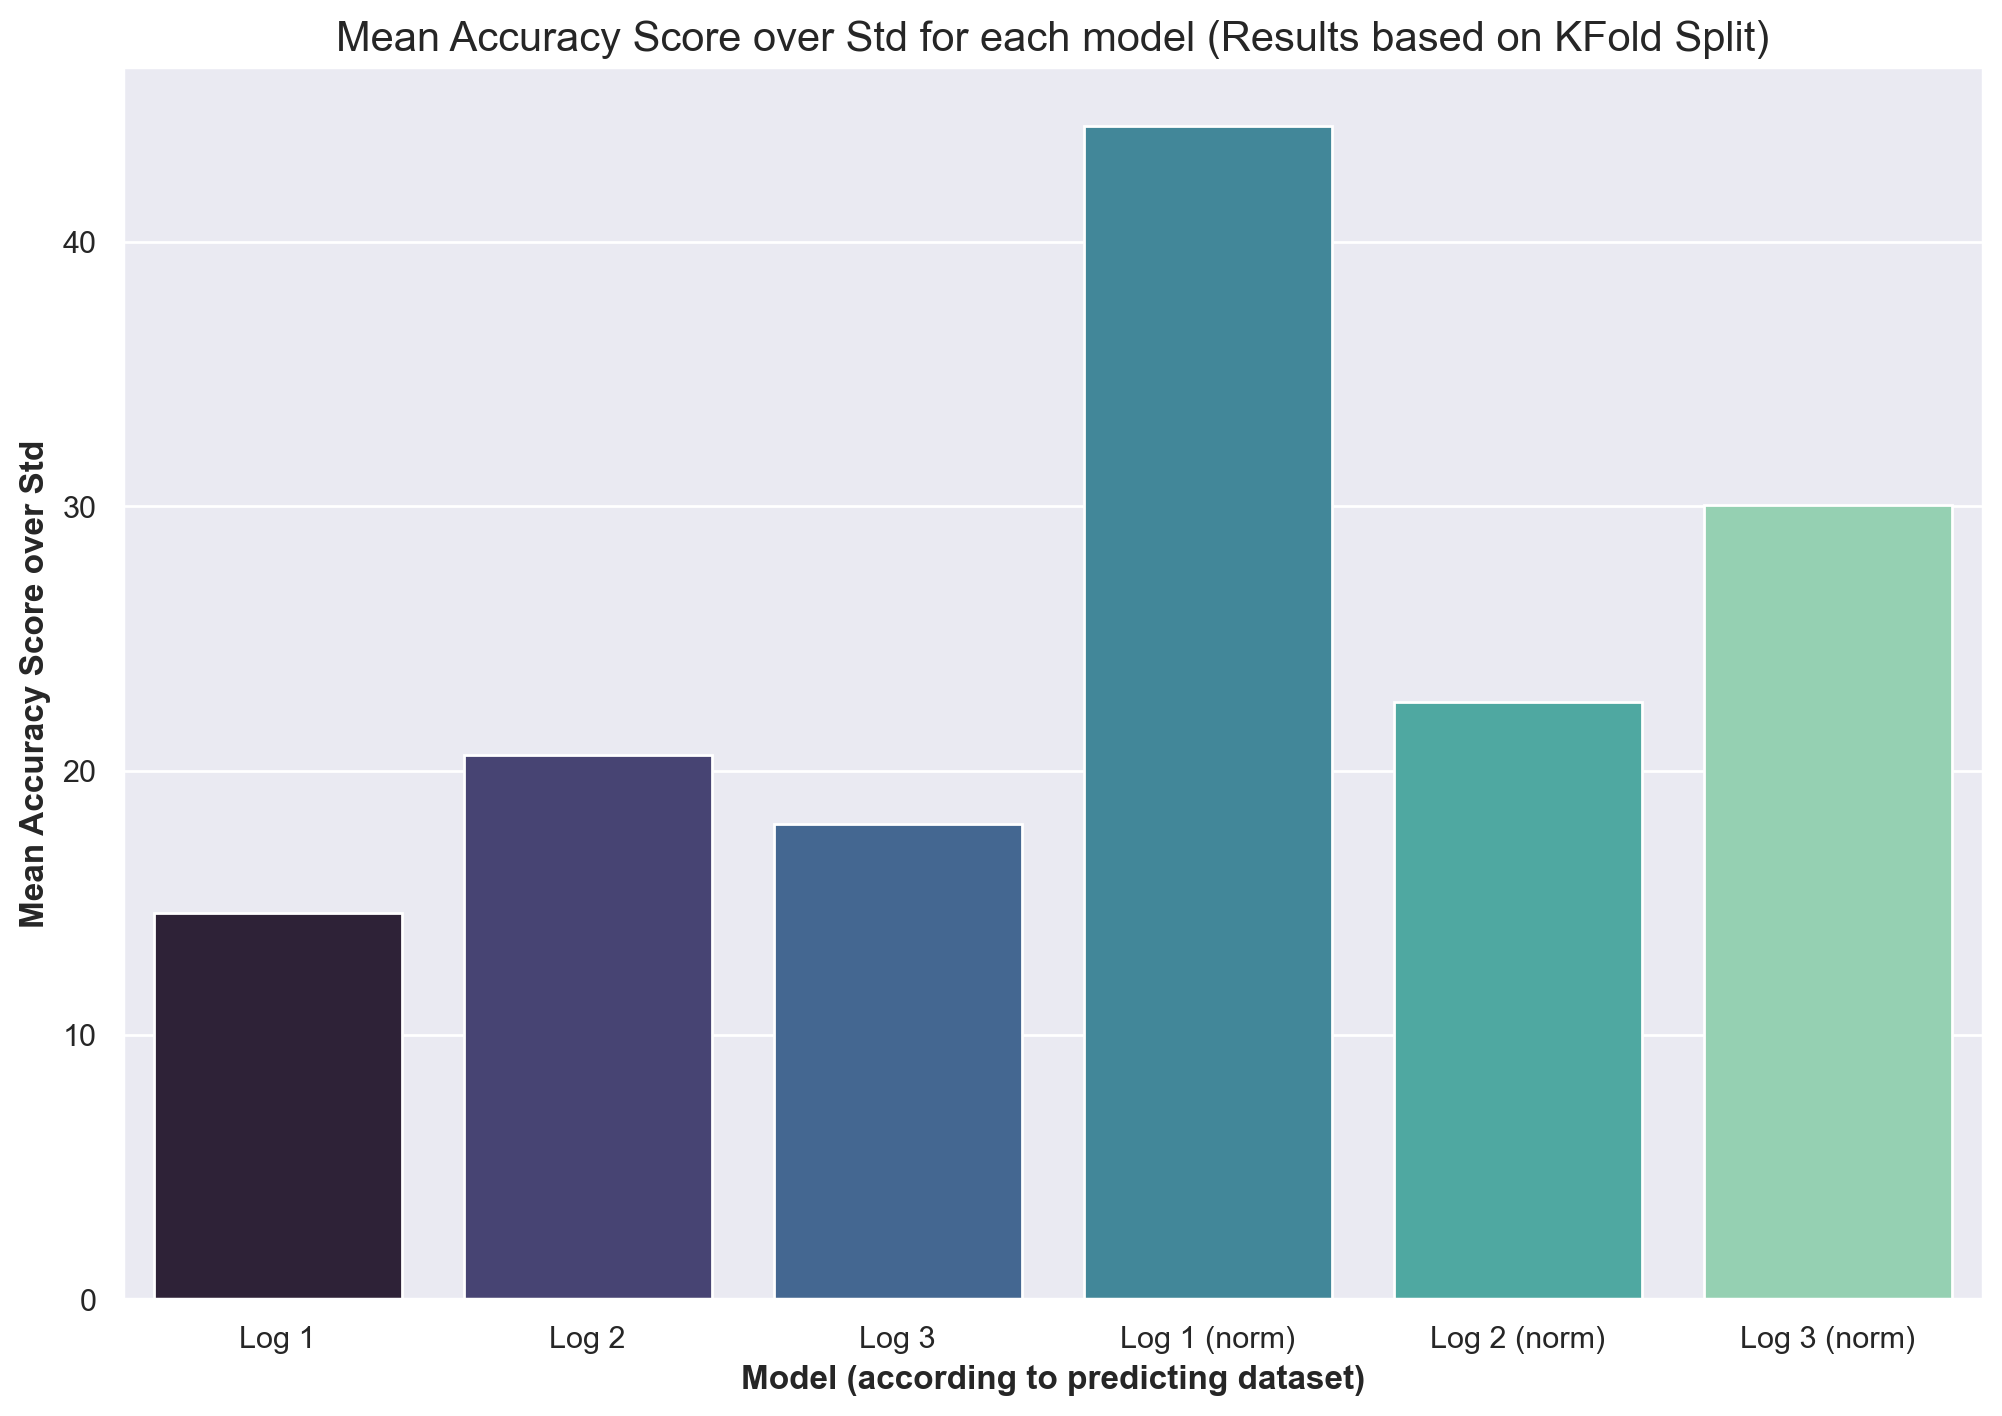

Which model is best? 
According to this KFold Split CV analysis based on Mean Acc. over Std, 
It´s Log 1 (norm)


In [31]:
cols = table1.columns.to_list()
vals = table1.loc['Mean/Std']

plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=cols, y=vals, palette='mako')
plt.ylabel('Mean Accuracy Score over Std', weight='bold')
plt.xlabel('Model (according to predicting dataset)', weight='bold')
plt.title('Mean Accuracy Score over Std for each model (Results based on KFold Split)',
         size=15)
plt.show()

print('Which model is best? \n' 
      'According to this KFold Split CV analysis based on Mean Acc. over Std, \n' 
      'It´s Log 1 (norm)')

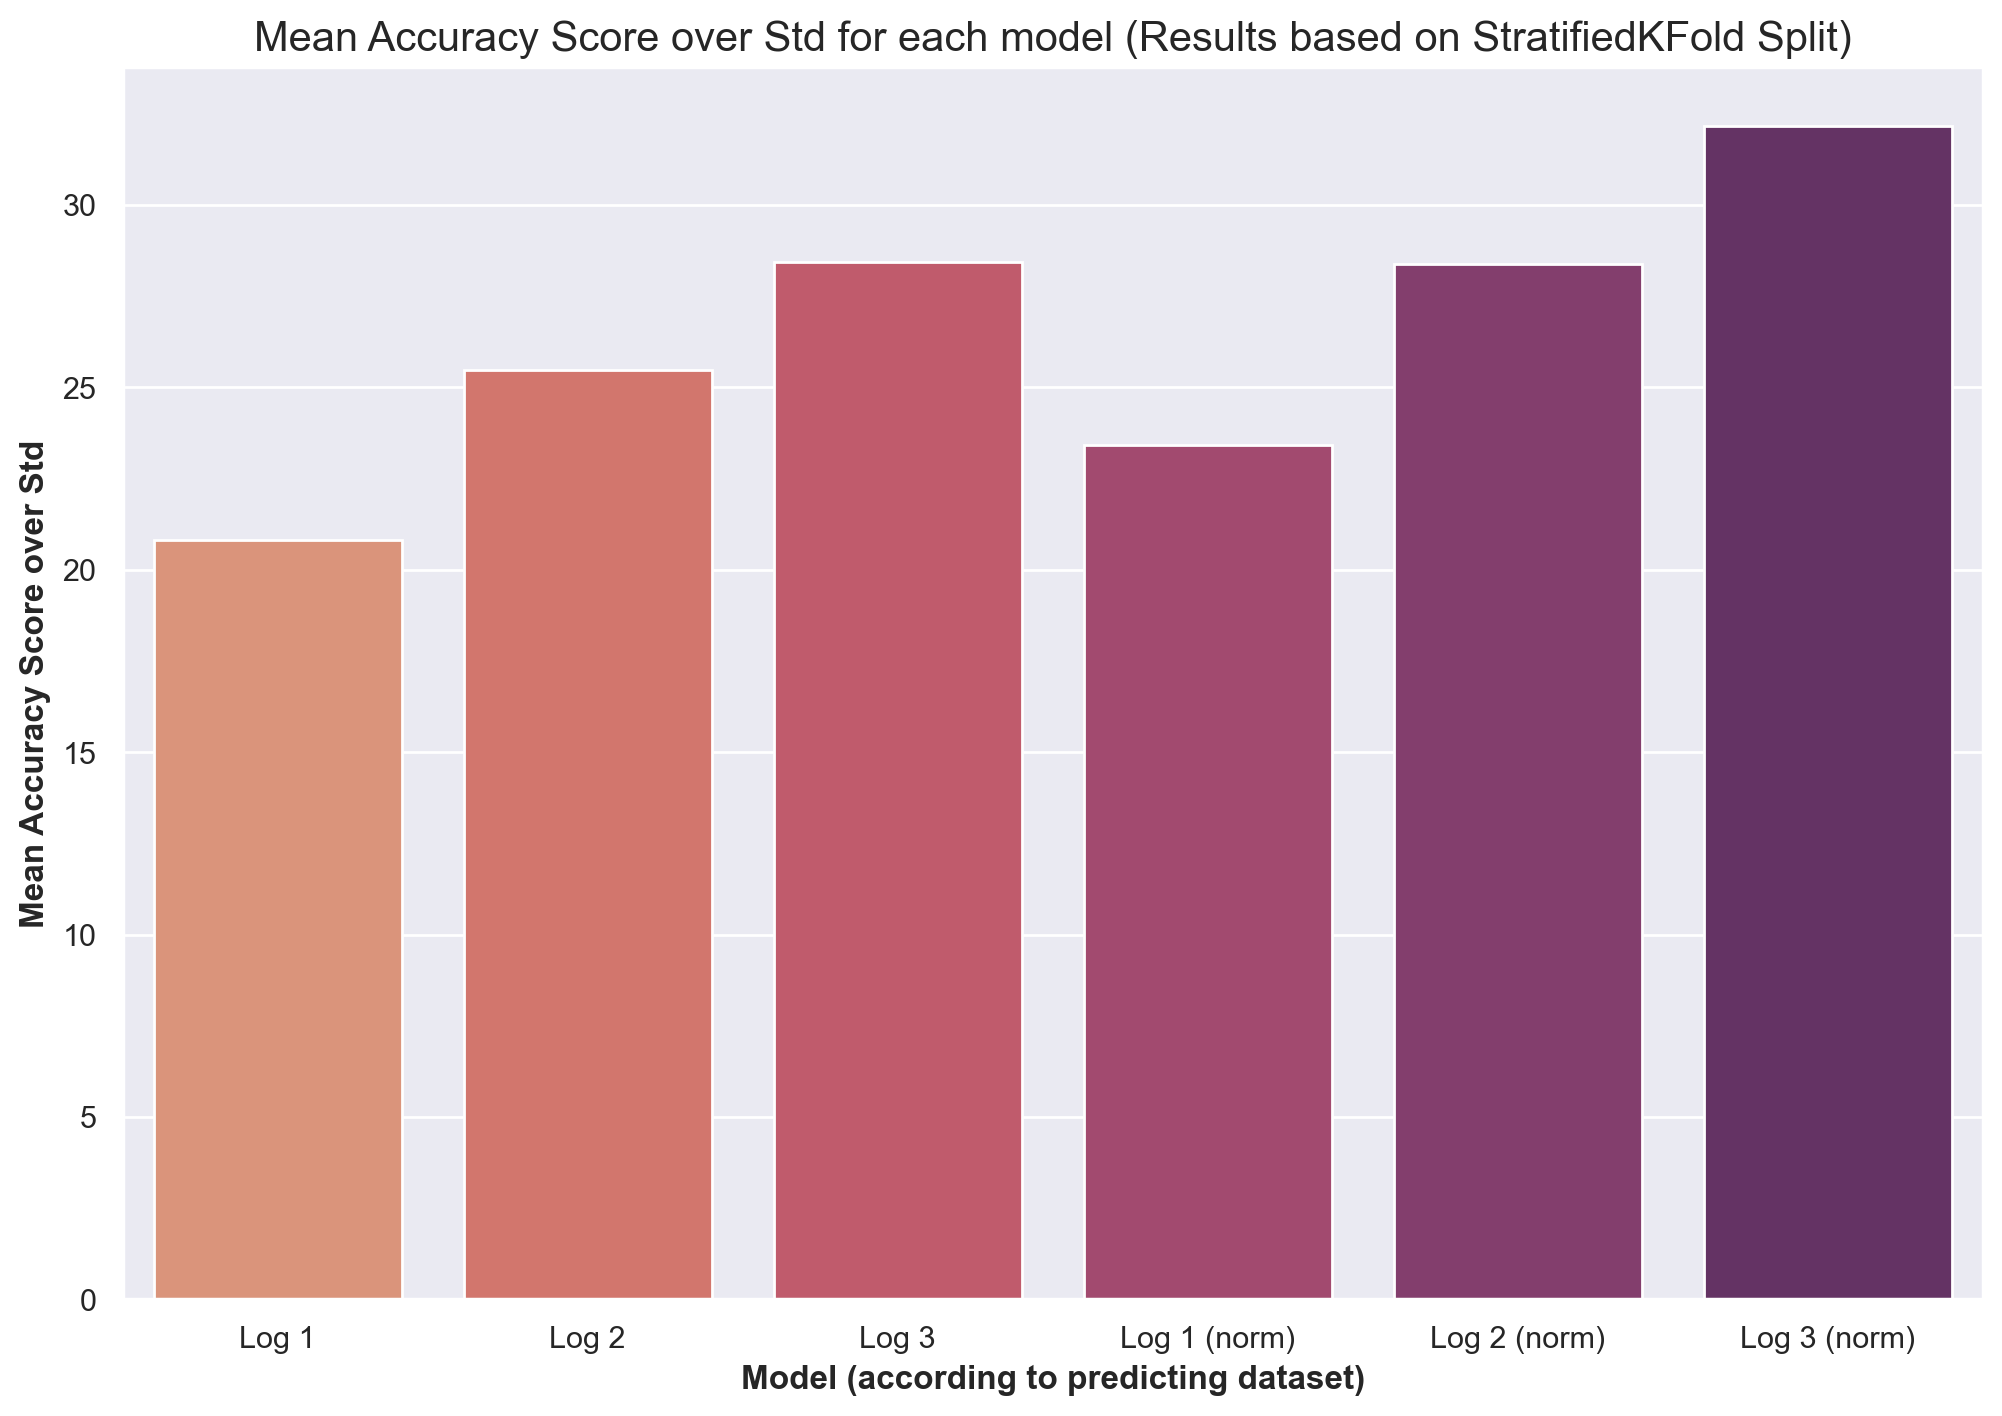

Which model is best? 
According to this StratifiedKFold Split CV analysis based on Mean Acc. over Std, 
It´s Log 3 (norm)


In [32]:
cols = table1_s.columns.to_list()
vals = table1_s.loc['Mean/Std']

plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=cols, y=vals, palette='flare')
plt.ylabel('Mean Accuracy Score over Std', weight='bold')
plt.xlabel('Model (according to predicting dataset)', weight='bold')
plt.title('Mean Accuracy Score over Std for each model (Results based on StratifiedKFold Split)',
         size=15)
plt.show()

print('Which model is best? \n' 
      'According to this StratifiedKFold Split CV analysis based on Mean Acc. over Std, \n' 
      'It´s Log 3 (norm)')

# 

In [33]:
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

In [34]:
# Run classifier with cross-validation and plot ROC curves
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=45229)
classifier = LogisticRegression(solver='newton-cholesky', fit_intercept=False, penalty=None)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

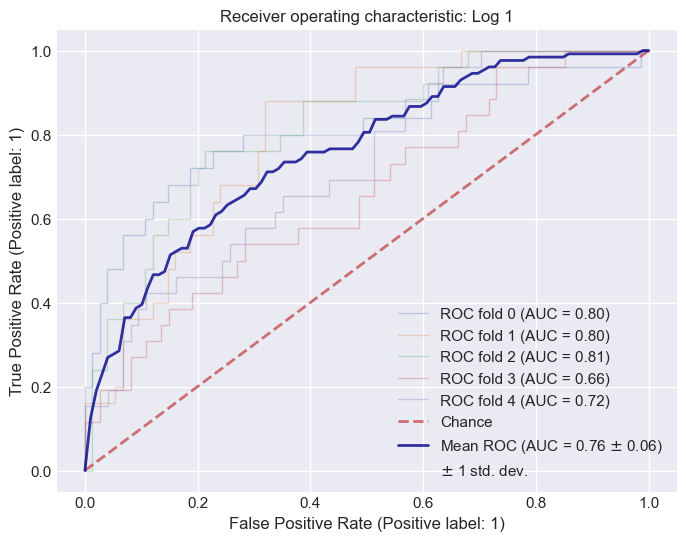

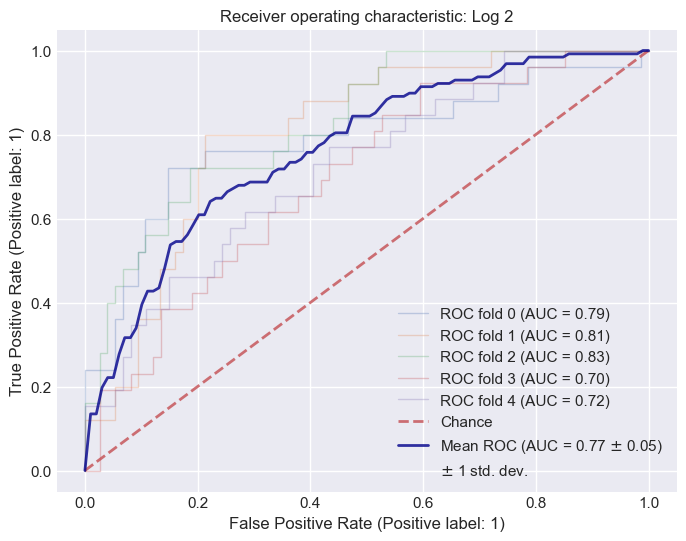

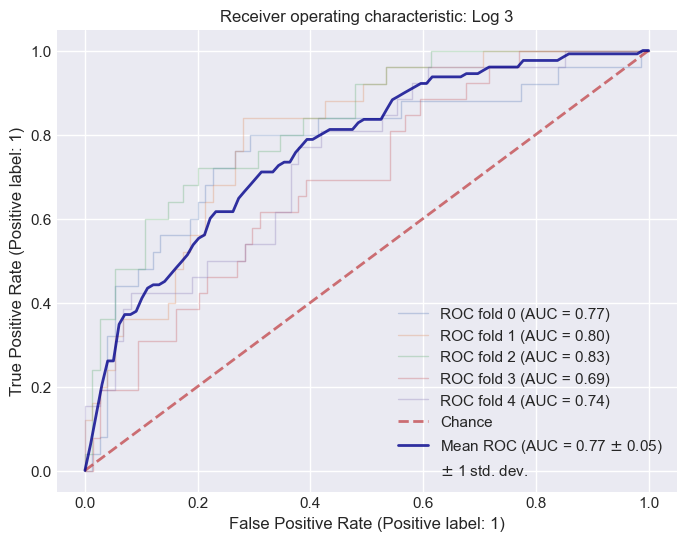

In [35]:
lst = [X, X1, X2]

for j in lst:
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(figsize=(8,6), dpi=100)
    for i, (train, test) in enumerate(skf.split(j, y)):
        
        classifier.fit(j[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            j[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="darkblue",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.,
        label=r"$\pm$ 1 std. dev.",
    )
      
    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example",
    )
    ax.legend(loc="lower right")
    
    # Assign different titles to each plot. We use the std of each dataset as a sort of ID
    if j.std() == lst[0].std():
        ax.set_title('Receiver operating characteristic: Log 1')
    if j.std() == lst[1].std():
        ax.set_title('Receiver operating characteristic: Log 2')
    elif j.std() == lst[2].std():
        ax.set_title('Receiver operating characteristic: Log 3')
    plt.show()
    
    tprs = []
    aucs = []

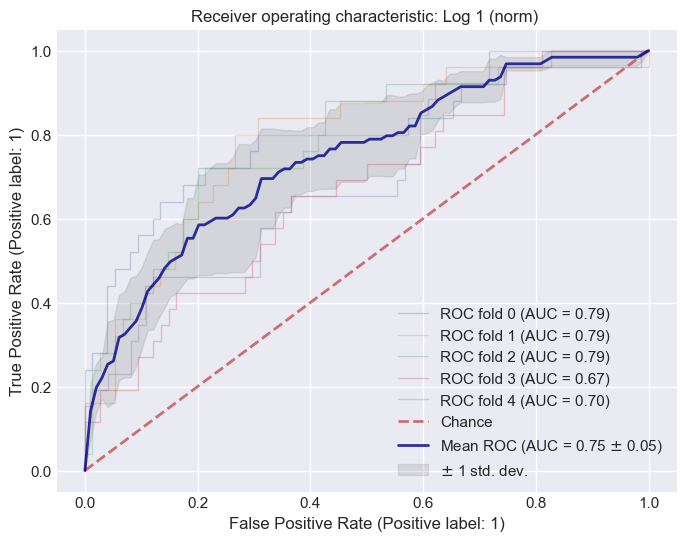

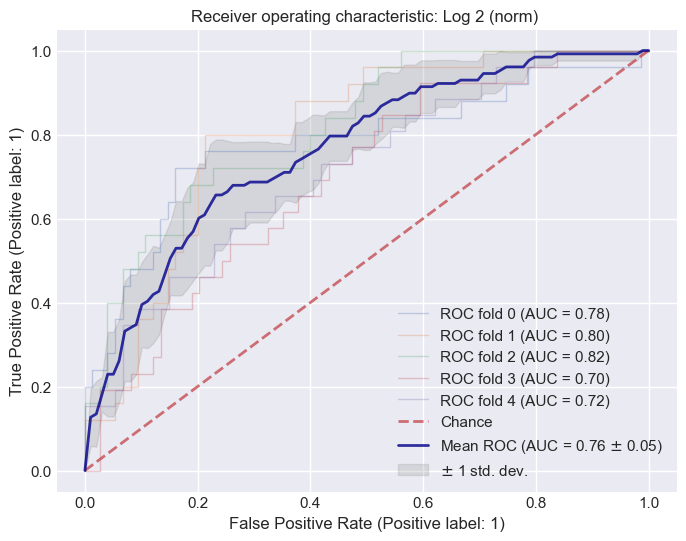

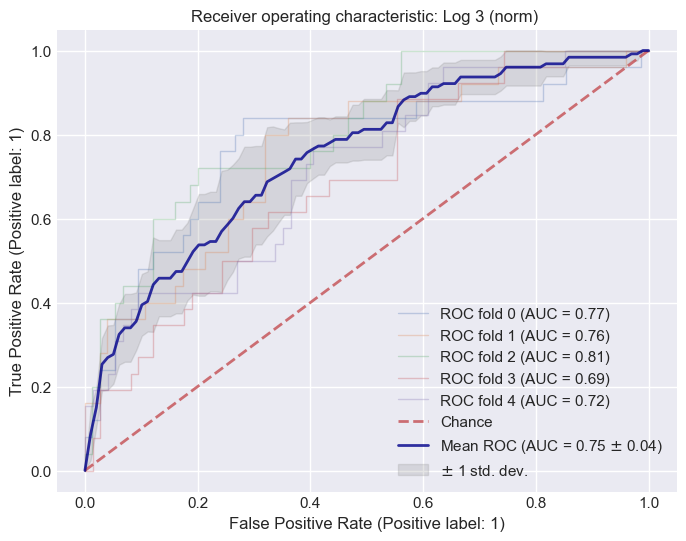

In [36]:
lst = [X, X1, X2]

for j in lst:
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(figsize=(8,6), dpi=100)
    for i, (train, test) in enumerate(skf.split(j, y)):
        
        # Transform datasets while avoiding data leakage
        X_train, X_test, y_train, y_test  = j[train], j[test], \
                                            y[train], y[test]
        
        x_train = scale.fit(X_train).transform(X_train)
        x_train[:,0] = 1
        
        x_test = scale.fit(X_test).transform(X_test)
        x_test[:,0] = 1
        #################
        
        classifier.fit(x_train, y_train)
        viz = RocCurveDisplay.from_estimator(
            classifier,
            x_test,
            y_test,
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="darkblue",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
      
    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example",
    )
    ax.legend(loc="lower right")
    
    # Assign different titles to each plot. We use the std of each dataset as a sort of ID
    if j.std() == lst[0].std():
        ax.set_title('Receiver operating characteristic: Log 1 (norm) ')
    if j.std() == lst[1].std():
        ax.set_title('Receiver operating characteristic: Log 2 (norm) ')
    elif j.std() == lst[2].std():
        ax.set_title('Receiver operating characteristic: Log 3 (norm) ')
    plt.show()
    
    tprs = []
    aucs = []

In [51]:
lst = [X, X1, X2]
aucs = []
for j in lst:
    plt.style.use('seaborn-v0_8-darkgrid')
    #fig, ax = plt.subplots(figsize=(11,9), dpi=200)
    for i, (train, test) in enumerate(skf.split(j, y)):
        
        # Transform variables avoiding data leakage
        X_train, X_test, y_train, y_test  = j[train], j[test], \
                                            y[train], y[test]
        
        x_train = scale.fit(X_train).transform(X_train)
        x_train[:,0] = 1
        
        x_test = scale.fit(X_test).transform(X_test)
        x_test[:,0] = 1
        
        
        classifier.fit(x_train, y_train)
        viz = RocCurveDisplay.from_estimator(
            classifier,
            x_test,
            y_test,
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
    print('ROC AUC Scores', np.around(np.array(aucs), 2))
    print('Mean Score', np.around(np.mean(aucs), 2))
    print('Scores Std', np.around(np.std(aucs), 4))
    print('Mean Score over Std', np.around(np.mean(aucs)/np.std(aucs), 2), '\n')
    aucs = []

ROC AUC Scores [0.79 0.79 0.79 0.67 0.7 ]
Mean Score 0.75
Scores Std 0.0515
Mean Score over Std 14.48 

ROC AUC Scores [0.78 0.8  0.82 0.7  0.72]
Mean Score 0.76
Scores Std 0.0472
Mean Score over Std 16.19 

ROC AUC Scores [0.77 0.76 0.81 0.69 0.72]
Mean Score 0.75
Scores Std 0.0414
Mean Score over Std 18.1 



## Stay tuned. Next time, we'll select our model based on REPEATED Stratified KFold cross validations